(1) I hereby agree to follow any and all assignment rules and procedures as stated in Canvas for this course, MATH2319.

(2) In particular, I solemnly swear that I will not discuss/ have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: QI SHEN

<font size="6" color='black'>Predicting the likelihood of whether the client will subscribe to a term deposit.</font>

The objective of this course project to fit and compare three different binary classifiers to predict whether a client will subscribe to a term deposit or not using the Bank Marketing Data Set(from May 2008 to November 2010). The dataset was sourced from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Bank+Marketing (Moro et al., 2014]). The descriptive features include 10 nominal categorical and 10 numeric features. The target feature is "y" which has two classes defined as "no" and "yes" respectively. The full dataset contains about 4119 observations.

This report is organized as follows:

- [Section 2 (Overview)](#2) 
- [Section 3 (Data Preparation)](#3) 
- [Section 4 (Data Exploration)](#4)
- [Section 5 (Predictive modelling)](#5) 
- [Section 6 (Performance Comparison)](#6) 
- [Section 7 (Limitations)](#7) 
- [Section 8 (Summary)](#8)

<font size="6" color='black'>Overview</font> <a id="2"></a> 

<font size="5" color='black'>Data Source</font>

The UCI Machine Learning Repository provides four datasets, but only bank-additional.csv is useful in this project. The bank-additional.csv and bank-additional-names.txt are the dataset and data set description respectively. The bank-additional-names.txt file contains the details of the variables (a.k.a. features or attributes). The dataset has 4119 observations. The target value is "y" features.

<font size="5" color='black'>Project Objective</font>

The project goal is to predict if the client will subscribe (yes/no) a term deposit (variable y) within an acceptable margin of error using categorical response with just main effects.

<font size="5" color='black'>Target Feature</font>

Our target feature is y, which is a categorical feature. Hence, our project is on a classification problem.

<font size="5" color='black'>Descriptive Features</font>

Let ’s briefly introduce these features:

<ol>
    <li>age (numeric) : Client age</li>
    <li>job (categorical) : type of work,possible values are 'retired','admin','management','blue-collar','housemaid','entrepreneur','unemployed','self-employed','technician','services','student' and 'unknown'.</li>
    <li>marital (categorical) : marital status,possible values are "single","divorced","married" and "unknown". </li>
    <li>education (categorical) : 
Education level of the client, possible values are "university.degree", "basic.4y", "professional.course", "basic.6y", "illiterate", "basic.9y", "high.school" and "unknown".  </li>
    <li>default (categorical) : has credit in default? Possible values are "yes","no" and "unknown".</li>
    <li>housing (categorical) : has housing loan? Possible values are "yes","no" and "unknown". </li>
    <li>loan (categorical) : has personal loan? Possible values are "yes","no" and "unknown". </li>
    <li>contact (categorical) : type of contact communication, possible values are "telephone" and "cellular".</li>
    <li>month (categorical) : last contact month of year, possible values are "jan", "feb", "mar", ..., "nov" and "dec". </li>
    <li>day_of_week (categorical) : last contact day of the week, possible values are "mon","tue","wed","thu" and "fri". </li>
    <li>duration (numeric) : last contact duration, in seconds.</li>
    <li>campaign (numeric) : number of contacts performed between campaign and client</li>
    <li>pdays (numeric): number of days that passed by after the client was last contacted from a previous campaign. Note: 999 means client was not previously contacted. </li>
    <li>previous (numeric) : number of contacts performed before this campaign and for this client</li>
    <li>poutcome (categorical) : outcome of the previous marketing campaign, possible values are "success", "failure" and "nonexistent"</li>
    <li>emp.var.rate (numeric) : employment variation rate(quarterly indicator)</li>
    <li>cons.price.idx (numeric) : consumer price index(monthly indicator) </li>
    <li>cons.conf.idx (numeric) : consumer confidence index(monthly indicator) </li>
    <li>euribor3m (numeric) : euribor 3 month rate(daily indicator)</li>
    <li>nr.employed (numeric) : number of employees(quarterly indicator)</li>
    <li>y (binary): target value, has the client subscribed a term deposit? Possible values are "yes" and "no".</li>
</ol>

<font size="6" color='black'>Data Preparation</font><a id="3"></a> 

<font size="5" color='black'>Preliminaries</font>

First, let's import all the common modules we will be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
import altair as alt
###
warnings.filterwarnings('ignore')
###
pd.set_option('display.max_columns', None) 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

We read the dataset directly from the localhost. We observe that the "unknown" character denotes missing values. Thus, we set this to a missing value while reading in the dataset.

In [2]:
bank = pd.read_csv("s3734247_Data.csv", sep=',', decimal='.', header = 0, na_values=['unknown'])

Display randomly selected 10 rows with random state 999.

In [3]:
bank.sample(n=10, random_state=999) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3792,32,technician,single,professional.course,no,yes,no,cellular,may,wed,97,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
2146,37,admin.,married,professional.course,NaN,yes,no,cellular,nov,wed,37,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1171,38,blue-collar,divorced,NaN,no,no,no,telephone,jun,fri,278,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
4033,49,admin.,married,basic.9y,NaN,no,yes,cellular,aug,thu,86,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
565,34,blue-collar,married,professional.course,no,yes,no,cellular,nov,tue,135,3,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
3471,46,management,married,university.degree,no,no,no,telephone,may,mon,103,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2737,59,housemaid,married,basic.4y,NaN,no,no,cellular,aug,tue,77,6,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4089,25,admin.,single,university.degree,no,yes,yes,cellular,oct,fri,115,1,999,1,failure,-3.4,92.431,-26.9,0.739,5017.5,yes
749,36,technician,single,high.school,no,yes,no,cellular,jul,wed,243,1,999,1,failure,-2.9,92.469,-33.6,1.029,5076.2,no
1150,41,entrepreneur,married,basic.4y,no,yes,no,telephone,jul,fri,89,2,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no


<font size="5" color='black'>Data Cleaning and Transformation</font>

We first confirm that the feature types match the descriptions outlined in the bank-additional-names.txt.

<font size="4" color='black'>Eliminating Redundant Features</font>

We observe that this dataset does not contain any one of the following:

<ol>
    <li>ID-Like columns</li>
   <li>Constant features</li>
     <li>Date or time features</li>
</ol>

However, we notice that columns "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m" and "nr.employed" are the social and economic context attributes. They have no predictive power for our prediction, we will drop these features.

In [4]:
bank = bank.drop(columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"])

Let's get a description of numerical and categorical columns respectively.

In [5]:
bank.describe(include=np.number).round(3)

,age,duration,campaign,pdays,previous
count,4119.000,4119.000,4119.000,4119.000,4119.000
mean,40.114,256.788,2.537,960.422,0.190
std,10.313,254.704,2.568,191.923,0.542
min,18.000,0.000,1.000,0.000,0.000
25%,32.000,103.000,1.000,999.000,0.000
50%,38.000,181.000,2.000,999.000,0.000
75%,47.000,317.000,3.000,999.000,0.000
max,88.000,3643.000,35.000,999.000,6.000


In [6]:
bank.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4080,4108,3952,3316,4014,4014,4119,4119,4119,4119,4119
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


<font size="4" color='black'>Imputing Missing Values</font>

In [7]:
print(f"\nNumber of missing values for each feature:")
print(bank.isnull().sum())


Number of missing values for each feature:
age              0
job             39
marital         11
education      167
default        803
housing        105
loan           105
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
dtype: int64


Let's impute any missing values with the mode for categorical features and with the median for numerical features.

In [8]:
bank_imputed = bank.copy()

cat_cols = bank_imputed.columns[bank_imputed.dtypes==object].tolist()
num_cols = bank_imputed.columns[bank_imputed.dtypes !=object].tolist()
# mode for categorical features
for cat_col in cat_cols:
    mode = bank_imputed[cat_col].mode()[0]
    print('Categorical Column ' + cat_col + ': Mode = ' + mode)
    bank_imputed[cat_col] = bank_imputed[cat_col].fillna(mode)

# median for numerical features
for num_col in num_cols:
    median = np.round(bank_imputed[num_col].median(), 3)
    print('Numerical Column ' + num_col + ': Median = ' + str(median))
    bank_imputed[num_col] = bank_imputed[num_col].fillna(median)
 

Categorical Column job: Mode = admin.
Categorical Column marital: Mode = married
Categorical Column education: Mode = university.degree
Categorical Column default: Mode = no
Categorical Column housing: Mode = yes
Categorical Column loan: Mode = no
Categorical Column contact: Mode = cellular
Categorical Column month: Mode = may
Categorical Column day_of_week: Mode = thu
Categorical Column poutcome: Mode = nonexistent
Categorical Column y: Mode = no
Numerical Column age: Median = 38.0
Numerical Column duration: Median = 181.0
Numerical Column campaign: Median = 2.0
Numerical Column pdays: Median = 999.0
Numerical Column previous: Median = 0.0


<font size="4" color='black'>Discretizing Numeric Feature "pdays"</font>

For the "pdays" numerical descriptive feature, we are to discretize it via different periods with 6 groups named as "no_contacted ","0_5","6_10","11_15","16_20" and "21_25". 

In [9]:
bank_imputed['pdays_group'] = ''
bank_imputed.loc[ (bank_imputed['pdays'] >= 0 ) &(bank_imputed['pdays'] <= 5),'pdays_group'] = '0_5'
bank_imputed.loc[ (bank_imputed['pdays'] >= 6 ) &(bank_imputed['pdays'] <= 10),'pdays_group'] = '6_10'
bank_imputed.loc[ (bank_imputed['pdays'] >= 11 ) &(bank_imputed['pdays'] <= 15),'pdays_group'] = '11_15'
bank_imputed.loc[ (bank_imputed['pdays'] >= 16 ) &(bank_imputed['pdays'] <= 20),'pdays_group'] = '16_20'
bank_imputed.loc[ (bank_imputed['pdays'] >= 21 ) &(bank_imputed['pdays'] <= 25),'pdays_group'] = '21_25'
bank_imputed.loc[ (bank_imputed['pdays'] == 999 ),'pdays_group'] = 'no_contacted'
bank_imputed = bank_imputed.drop(columns = ["pdays"])

In [10]:
bank_imputed.sample(5, random_state=999)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,pdays_group
3792,32,technician,single,professional.course,no,yes,no,cellular,may,wed,97,2,0,nonexistent,no,no_contacted
2146,37,admin.,married,professional.course,no,yes,no,cellular,nov,wed,37,1,0,nonexistent,no,no_contacted
1171,38,blue-collar,divorced,university.degree,no,no,no,telephone,jun,fri,278,1,0,nonexistent,no,no_contacted
4033,49,admin.,married,basic.9y,no,no,yes,cellular,aug,thu,86,3,0,nonexistent,no,no_contacted
565,34,blue-collar,married,professional.course,no,yes,no,cellular,nov,tue,135,3,0,nonexistent,no,no_contacted


<font size="4" color='black'>Detecting outlines </font>

For the "duration" feature, the max value is 3643.000 which is much greater than the mean value, we will do filtering on this feature by IQR and then impute outliers with the median.

In [11]:
bank_imputed['duration'] = bank_imputed['duration'][bank_imputed['duration'].between(bank_imputed['duration'].quantile(.25), bank_imputed['duration'].quantile(.75), inclusive=True)]
bank_imputed['duration'] = bank_imputed['duration'].fillna(256.788)

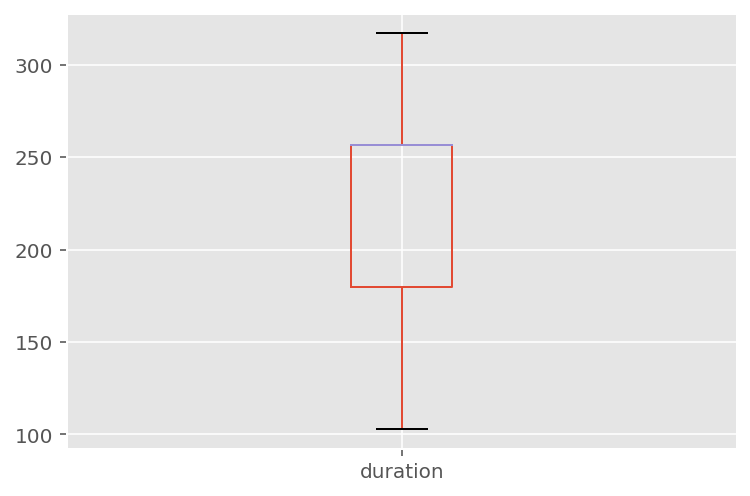

In [12]:
boxplot = bank_imputed.boxplot(column=['duration'])

<font size="6" color='black'>Data Exploration</font><a id="4"></a> 

Our dataset can now be considered "clean" and ready for visualisation and statistical modelling.

<font size="5" color='black'>Univariate Visualisation</font>

Let's get a histogram of "job" feature

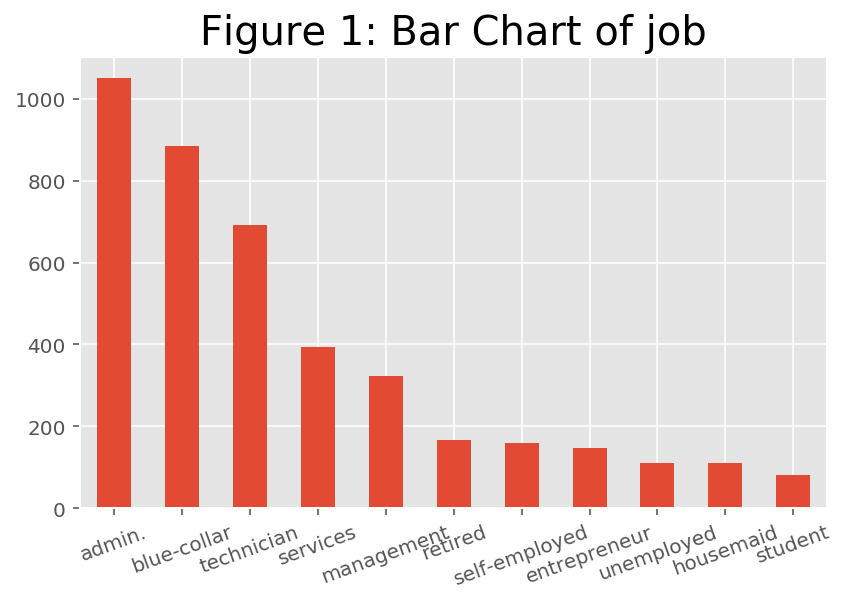

In [13]:
ax = bank_imputed['job'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of job', fontsize = 20)
plt.show();

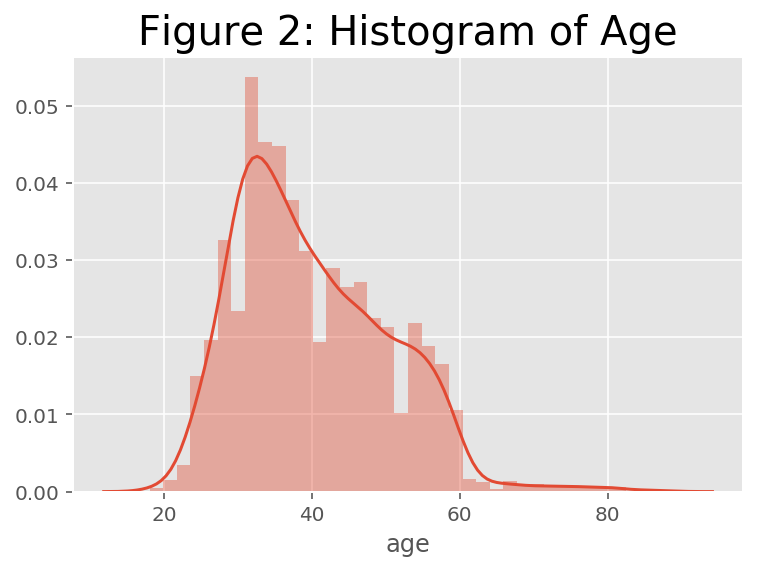

In [14]:
# get a histogram of age with kernel density estimate
sns.distplot(bank_imputed['age'], kde = True).set_title('Figure 2: Histogram of Age', fontsize = 20)
plt.show();

<font size="5" color='black'>Multivariate Visualisation</font>

<font size="4" color='black'>Two-variable plots</font>

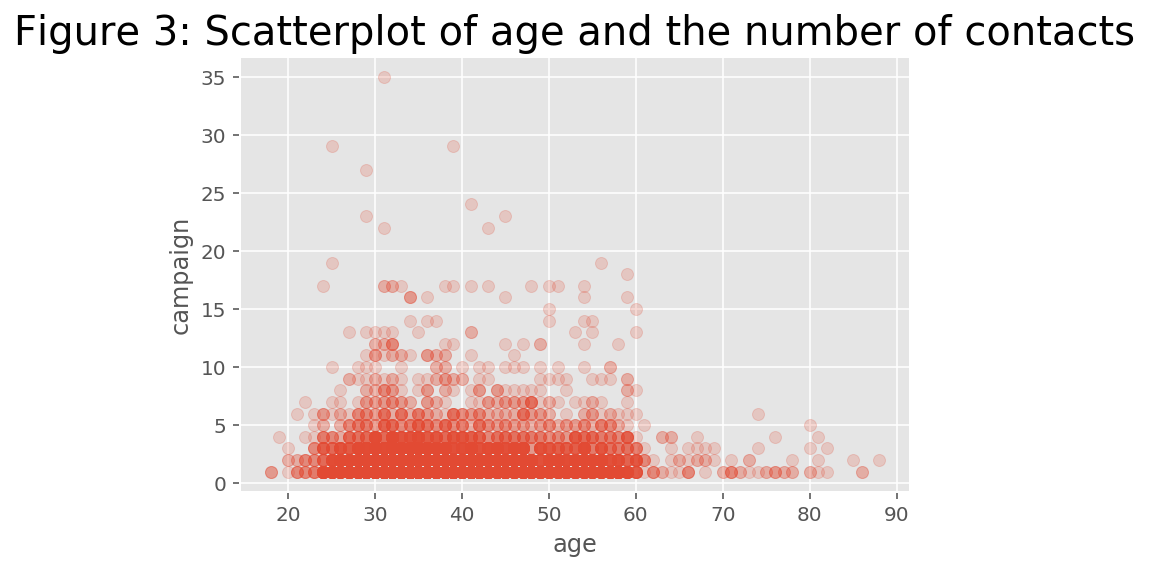

In [15]:
hpw = bank_imputed['age']
plt.scatter(hpw, bank_imputed['campaign'], alpha = 0.2)
plt.title('Figure 3: Scatterplot of age and the number of contacts', fontsize = 20)
plt.xlabel('age')
plt.ylabel('campaign')
plt.show();

According to the plot, as the age of the client increases, the number of contacts performed between this campaign and the client will decrease.

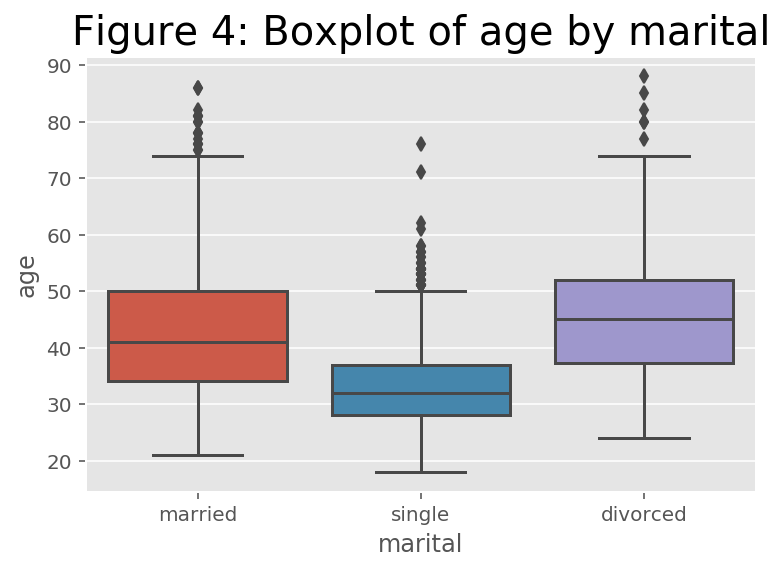

In [16]:
sns.boxplot(bank_imputed['marital'], bank_imputed['age']);
plt.title('Figure 4: Boxplot of age by marital', fontsize = 20)
plt.show();

According to the plot, we can find an interesting phenomenon. The divorced median is greater than married median and the married median is greater than the single median.

<font size="4" color='black'>Three-variable plots</font>

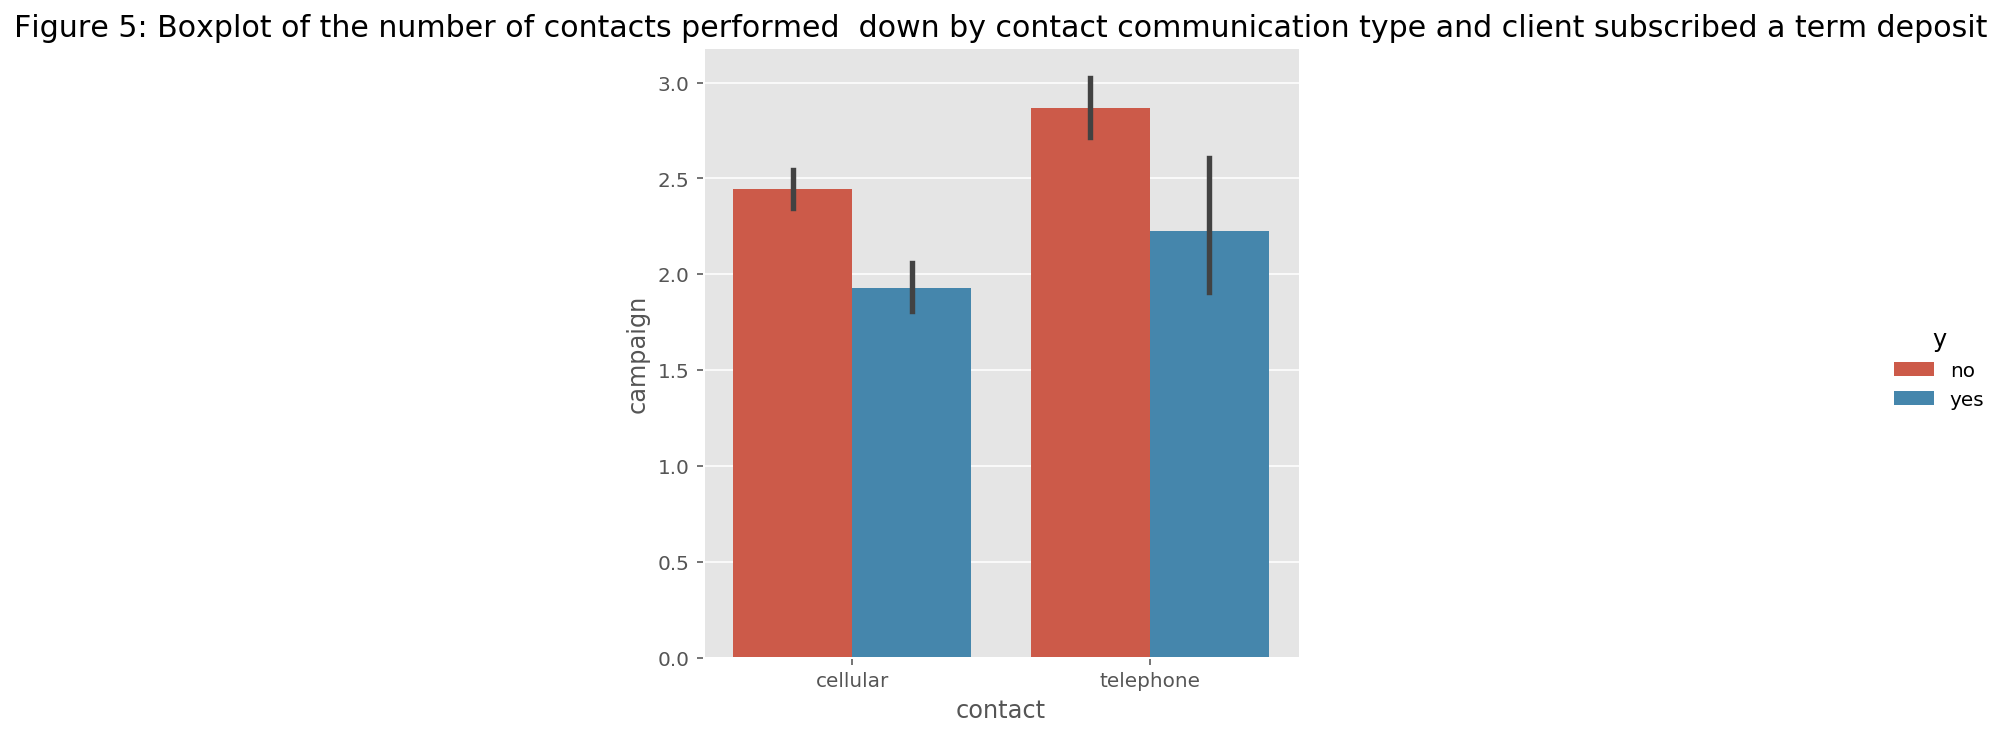

In [17]:
sns.catplot(x="contact", y="campaign", hue="y", kind="bar", data=bank_imputed);
plt.title('Figure 5: Boxplot of the number of contacts performed  down by contact communication type and client subscribed a term deposit', fontsize = 15)
plt.show();

From Figure 5, we see that bank manager use telephone connect with the client have a higher probability for client subscribed a term deposit.

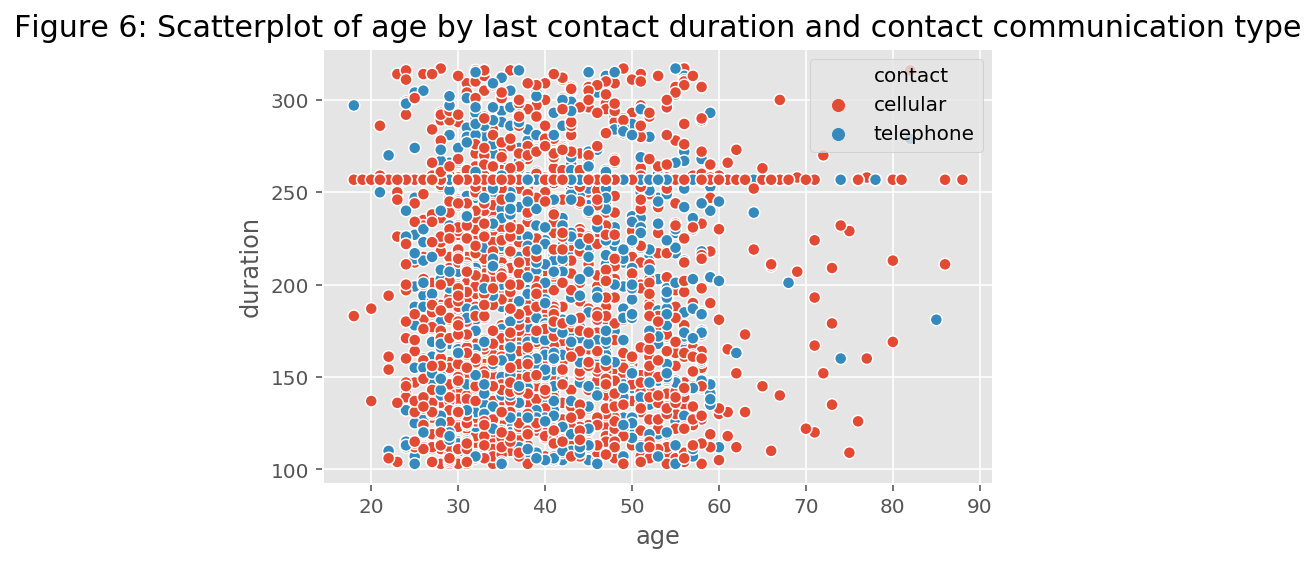

In [18]:
sns.scatterplot(bank_imputed['age'], bank_imputed['duration'], hue = bank_imputed['contact'])
plt.title('Figure 6: Scatterplot of age by last contact duration and contact communication type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

From Figure 6, it is obverse that as the age increases, the duration of contact will gradually decrease and contact communication type tend to cellular.

<font size="6" color='black'>Predictive modelling</font><a id="5"></a> 

<font size="5" color='black'>Overview of methodology</font>

We consider the following (binary) classifiers to predict the target feature:
<ol>
    <li>K-Nearest Neighbors (KNN),</li>
    <li>Decision trees (DT), and</li>
    <li>Naive Bayes (NB).</li>
</ol>
Our modelling strategy begins by transforming the full dataset cleaned in Data Preparation part. This transformation includes encoding categorical descriptive features as numerical and then scaling of the descriptive features. We will split all observations into training and test sets with 70% and 30% respectively. This way, our training data has 2883 rows and test data has 1236 rows. To be clear, our terminology here is that 
<ol>
    <li>The 2883 rows of data used during the hyperparameter tuning phase is called the training data.</li>
    <li>The 1236 rows of data used during the performance comparison phase is called the test data.</li>
</ol>

Before fitting a particular classifier on the training data, we select the best features using the powerful Random Forest Importance method inside a pipeline. We consider 10, 20, and the full set of features after encoding of categorical features. Using feature selection together with hyperparameter search inside a single pipeline, we conduct 5-fold stratified cross-validation to fine-tune hyperparameters of each classifier using the area under the curve (AUC) as the performance metric. We build each model using parallel processing with "-2" cores. because of the unbalanced target class issue.

<font size="5" color='black'>Encoding Categorical Features</font>

Before modeling, it is essential to encode all categorical features include the target feature into a set of numerical features.



<font size="4" color='black'>Encoding the Target Feature</font>

We remove the "y" feature from the dataset and named as "target". The rest of the features are the descriptive features which we call "Data".

In [19]:
Data = bank_imputed.drop(columns='y')
target = bank_imputed['y']
target.value_counts()

no     3668
yes     451
Name: y, dtype: int64

Let's encode the target feature so that the positive class is "yes" and it is encoded as "1"; the negative  class is "no" and it is encoded as "0". 

In [20]:
target = target.replace({'no': 0, 'yes': 1})
target.value_counts()

0    3668
1     451
Name: y, dtype: int64

<font size="4" color='black'>Encoding Categorical Descriptive Features</font>

Since all of the descriptive features appear to be nominal, we perform one-hot-encoding. Furthermore, since we plan on conducting feature selection, we define  𝑞  dummy variables for a categorical descriptive variable with  𝑞  levels. The exception here is that when a categorical descriptive feature has only two levels, we define a single dummy variable. Let's extract the list of categorical descriptive features.

In [21]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()

Before any transformation, the categorical features are as follows.

In [22]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'pdays_group']

For each two-level categorical variable, we set the drop_first option to True to encode the variable into a single column of 0 or 1. 

In [23]:
# two-level categorical variable
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

We apply the get_dummies() function for the regular one-hot encoding for categorical features with greater than 2 levels.

In [24]:
Data = pd.get_dummies(Data)

After encoding all categorical features, let's have a look of all features.

In [25]:
Data.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'pdays_group_0_5',
       'pdays_group_11_15', 'pdays_group_16_20', 'pdays_group_21_25',
       'pdays_group_

In [26]:
Data.sample(5, random_state=999)

,age,default,housing,loan,contact,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_group_0_5,pdays_group_11_15,pdays_group_16_20,pdays_group_21_25,pdays_group_6_10,pdays_group_no_contacted
3792,32,0,1,0,0,256.788,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2146,37,0,1,0,0,256.788,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1171,38,0,0,0,1,278.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4033,49,0,0,1,0,256.788,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
565,34,0,1,0,0,135.000,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


<font size="5" color='black'>Scaling of Features</font>

After encoding all the categorical features, we need to scale all data set with MinMaxScaler. Before encoding, make a copy.

In [27]:
Data_df = Data.copy()
col_names = Data_df.columns
scaler_Data = preprocessing.MinMaxScaler().fit_transform(Data)
# convert to a data frame with correct column names
pd.DataFrame(scaler_Data, columns=col_names).sample(n=5, random_state=999)

,age,default,housing,loan,contact,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_group_0_5,pdays_group_11_15,pdays_group_16_20,pdays_group_21_25,pdays_group_6_10,pdays_group_no_contacted
3792,0.200000,0.0,1.0,0.0,0.0,0.718636,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2146,0.271429,0.0,1.0,0.0,0.0,0.718636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1171,0.285714,0.0,0.0,0.0,1.0,0.817757,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4033,0.442857,0.0,0.0,1.0,0.0,0.718636,0.058824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
565,0.228571,0.0,1.0,0.0,0.0,0.149533,0.058824,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<font size="5" color='black'>Feature Selection & Ranking</font>

Now we will select top 10 influential features.

In [28]:
num_of_features = 10
model_rfi = RandomForestClassifier(n_estimators=100).fit(Data, target)
Feature_Selection_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_of_features]
best_features = Data_df.columns[Feature_Selection_indices_rfi].values
best_features

array(['age', 'duration', 'campaign', 'pdays_group_no_contacted',
       'housing', 'poutcome_success', 'previous', 'month_jun',
       'job_admin.', 'loan'], dtype=object)

In [29]:
feature_importances_rfi = model_rfi.feature_importances_[Feature_Selection_indices_rfi]
feature_importances_rfi

array([0.16666728, 0.08021614, 0.0684483 , 0.03637013, 0.03279828,
       0.02927629, 0.02384239, 0.02197467, 0.0211565 , 0.02089755])

Random Forest Importance (RFI) select most important 10 features which is 'age', 'duration', 'campaign', 'housing','pdays_group_no_contacted', 'poutcome_success', 'previous','day_of_week_thu', 'day_of_week_tue',  'contact'. In the next few steps, we will search over 10, 20 and the full dataset to detect which number of features do the best with the classifier.

In [30]:
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [31]:
plot_imp(best_features, feature_importances_rfi, 'Random Forest', 'green')

alt.Chart(...)

<font size="5" color='black'>Train-Test Splitting</font>

Convert Pandas data frames to a NumPy array. 

In [32]:
Data_sample = pd.DataFrame(Data).values
target_sample = pd.DataFrame(target).values

print(Data_sample.shape)
print(target_sample.shape)

(4119, 53)
(4119, 1)


In [33]:
Data_sample_train, Data_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_sample, target_sample, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target_sample)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(2883, 53)
(1236, 53)


<font size="5" color='black'>Model Evaluation Strategy</font>

For each model, we will use 5-fold stratified cross-validation evaluation method for hyperparameter tuning.

In [34]:
cv_method = StratifiedKFold(n_splits=5,random_state=999)

<font size="5" color='black'>Hyperparameter Tuning 
K-Nearest Neighbors (KNN)</font>

In [35]:
# here we set n_estimators to100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # @override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [36]:
pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [37]:
gs_pipe_KNN.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:    6.8s finished


In [1]:
gs_pipe_KNN.best_params_

NameError: name 'gs_pipe_KNN' is not defined

In [39]:
gs_pipe_KNN.best_score_.round(3)

0.664

We observe that the optimal KNN model has a mean AUC score of about 0.664. The best performing KNN selected 53 features with 20 nearest  neighbours and 𝑝=1 , which is the Manhattan distance. Now we will use other combination methods to see if the difference is rather significant or not.

In [40]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [41]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
26,0.663881,0.021064,0.693060,0.629831,20.0,1.0,53.0
25,0.655065,0.027884,0.700192,0.615257,20.0,1.0,20.0
24,0.649871,0.016184,0.671153,0.630357,20.0,1.0,10.0
20,0.648850,0.030069,0.693710,0.600189,15.0,1.0,53.0
18,0.646225,0.031693,0.699032,0.616402,15.0,1.0,10.0


We observe that the difference between the hyperparameter combinations is not really much when conditioned on the number of features selected. Let's visualize the results of the grid search corresponding to 53 selected features.

In [42]:
results_KNN_53_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 53.0]

alt.Chart(results_KNN_53_features, 
          title='KNN Performance Comparison with 53 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

<font size="5" color='black'>(Gaussian) Naive Bayes (NB)</font>

Now let's talk about Gaussian Naive Bayes. The default var_smoothing parameter's value is 10−9. We conduct the grid search in the logspace (over the powers of 10) sourced from NumPy.We perform a random search over only 20 different values for better efficiency. Since Naive Bayes requires each descriptive feature to follow a gaussian distribution, we first perform a power transformation on the original data set before model fitting.

In [43]:
Data_sample_train_transformed = PowerTransformer().fit_transform(Data_sample_train)
pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, target_sample_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    3.7s finished


In [44]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 20, 'nb__var_smoothing': 0.10718913192051276}

In [45]:
gs_pipe_NB.best_score_.round(3)

0.755

The optimal Naive Bayes yiels an AUC score of about 0.754 with 20 features - slightly higher than that of KNN which is 0.674. At this point, we cannot conclude NB is better than KNN. For this result, we will have to perform a paired t-test on the test data as discussed further below.

In [46]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
1,0.755111,0.019751,0.780516,0.724587,20.0,0.107189
16,0.752867,0.015798,0.769037,0.723583,20.0,0.013355
11,0.752202,0.014527,0.764457,0.724313,20.0,0.038720
5,0.749254,0.012625,0.763251,0.726593,20.0,0.061510
9,0.748677,0.015695,0.769021,0.722367,20.0,1.035322


In [47]:
results_NB_20_features = results_NB[results_NB['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_NB_20_features, 
          title='NB Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

<font size="5" color='black'>Decision Trees (DT)</font>

Now we build decision trees using Gini index to get maximum information gain. We aim to determine the optimal combinations of maximum depth (max_depth) and minimum sample split (min_samples_split).

In [48]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:    2.7s finished


In [49]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [50]:
gs_pipe_DT.best_score_.round(3)

0.722

The best DT has a maximum depth of 5 and minimum split value of 5 samples with an AUC score of about 0.733. A visualization of the search results is given below for 10 features.

In [51]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

<font size="5" color='black'>Further Fine Tuning</font>

We notice that the optimal value of maximum depth hyperparameter appear to cross together and some of them at the extreme end of its search space. Now we need to make sure that we are not missing out on even better values.

In [52]:
params_pipe_DT2 = {'rfi_fs__n_features_': [20],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:    1.9s finished


In [53]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 150, 'rfi_fs__n_features_': 20}

In [54]:
gs_pipe_DT2.best_score_.round(3)

0.763

we get slightly better results with the new search space which is about 0.771, greater than 0.709. 

In [55]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
7,0.763115,0.050448,0.833596,0.697060,10.0,150.0,20.0
1,0.760201,0.022788,0.782295,0.718476,5.0,50.0,20.0
6,0.759108,0.049800,0.816393,0.691163,10.0,100.0,20.0
10,0.758695,0.050012,0.825412,0.698124,15.0,100.0,20.0
3,0.757417,0.027758,0.790990,0.714357,5.0,150.0,20.0


In [56]:
results_DT_20_features = results_DT[results_DT['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_DT_20_features, 
          title='DT Performance Comparison with 20 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

<font size="6" color='black'>Performance Comparison</font><a id="6"></a> 


During the hyperparameter tuning phase above, we used the 4119 rows in our training data within a cross-validation framework and we determined the best hyperparameter values for each of the three binary classifiers. For instance, for KNN, it turned out that the best set of hyperparameter values is  𝑘=20  and  p=Manhattan distance with the best 53 features as selected by the RFI feature selection method.

What we would like to do now is to "fit" each tuned classifier with the best set of hyperparameter values on the 1236 rows in the test data set in a cross-validated fashion to figure out which tuned classifier performs the best. This way, we would be measuring performance of the tuned classifiers on data that they did not "see" previously.

Since cross validation itself is a random process, we would like to perform pairwise t-tests to determine if any difference between the performance of any two (tuned) classifiers is statistically significant. Specifically, we first perform 10-fold stratified cross-validation (without any repetitions) on each (tuned) classifier where we use the same seed in each of the three cross-validation runs. Second, we conduct a paired t-test for the AUC score between the following (tuned) classifier combinations:

<ol> 
    <li>KNN vs. NB,</li>
      <li>KNN vs. DT, and</li>
      <li>DT vs. NB.</li>
    
</ol>

<font size="4" color='black'>Discussion: cross-validation with paired t-tests</font>

In [57]:
cv_method_ttest = StratifiedKFold(n_splits=10)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.6679589779589781

In [58]:
Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.728646781146781

In [59]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7454143154143155

<font size="4" color='black'>Running the following (paired) t-tests </font>

In [60]:
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-1.6803308160857, pvalue=0.12719445836247698)
Ttest_relResult(statistic=3.4442437820897296, pvalue=0.007341137027041807)
Ttest_relResult(statistic=0.5990467520785556, pvalue=0.563914308566364)


KNN is statistically the best model in this competition (in terms of AUC) when compared on the test data.

Now, we will consider the following metrics to evaluate models based on the test set:

<ol>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 Score (the harmonic average of precision and recall)</li>
    <li>Confusion Matrix</li>
    
</ol>

In [61]:
pred_KNN = gs_pipe_KNN.predict(Data_sample_test)
Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)
pred_DT = gs_pipe_DT2.predict(Data_sample_test)

In [62]:
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_sample_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_sample_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_sample_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1101
           1       0.00      0.00      0.00       135

    accuracy                           0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1101
           1       0.58      0.23      0.33       135

    accuracy                           0.90      1236
   macro avg       0.75      0.60      0.64      1236
weighted avg       0.88      0.90      0.88      1236


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1101
           1       0.56      0.28      0.37       135

    accuracy                           0.90      1236
  

The confusion matrices are given below.

In [63]:

print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_sample_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_sample_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_sample_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[1101    0]
 [ 135    0]]

Confusion matrix for Naive Bayes
[[1079   22]
 [ 104   31]]

Confusion matrix for Decision Tree
[[1071   30]
 [  97   38]]


Suppose we are bank product sales and we would like to predict if the client will subscribe a term deposit. According to the result, Decision Tree would be the best performer since it produces the highest precision-recall score. The confusion matrices are in line with the classification reports. This is in contrast to our finding that K-Nearest Neighbor is statistically the best performer when it comes to the AUC metric.

<font size="6" color='black'>Limitations</font><a id="7"></a> 

<ol>
    <li>Although we get the best performer by Decision Tree, the one-hot encoding should not be fit to the decision tree model results.</li>
    <li>It is obvious that the size of target_sample_test is too small，as a result, we get the precision score for positive of  K-Nearest Neighbor which is 0.</li>
    <li>The decision tree cost about 30 seconds to compute which takes a lot of time and decision tree algorithm is inadequate for applying regression and predicting continuous values. In the dataset, we have "age" and "duration" two continuous features which will result in deviations. </li>
</ol>

<font size="6" color='black'>Summary</font><a id="8"></a> 

In this course project, we focus on three K-Nearest Neighbor, Naive Bayes and Decision Tree as their abilities for the classification of new objects. Bank Marketing Data Set, which is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. Our goal is to detect if the client will subscribe to a term deposit.
On the basis of the random forest importance, we get top 10 important features which are 'age', 'duration', 'campaign', 'pdays_group_no_contacted','housing', 'poutcome_success', 'previous', 'month_jun','day_of_week_tue' and 'education_university.degree', and therefore, the Bank teller can do a basic prediction whether this client will subscribe a term deposit or not, as a result, efficiency can be increased.

Moreover, according to the evaluate models, decision tree has the best recall value. The recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. The negative recall value is about 0.96 which is really good. But positive value is about 0.34  which is really bad. When we do the feather prediction, we need to pay more attention to the positive result.

Therefore, the decision tree has the best prediction result but still far from the actual results. Bank product sales should make the final decision based on customer decision.




<font size="6" color='black'>References</font><a id="8"></a> 

* Archive.ics.uci.edu. 2020. UCI Machine Learning Repository: Bank Marketing Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/Bank+Marketing> [Accessed 26 May 2020].